# 6 State Model Net Cycle Flux Testing

In [1]:
import os
import sys

import numpy as np
import sympy
import networkx as nx
import matplotlib.pyplot as plt

from kda import plotting, graph_utils, calculations, diagrams, expressions, ode

In [2]:
kvals1 = np.array(
    [
        [0, 1, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 1, 0],
    ]
)
kvals2 = np.array(
    [
        [0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 1, 0],
    ]
)

G1 = nx.MultiDiGraph()
graph_utils.generate_edges(G1, kvals1)
G2 = nx.MultiDiGraph()
graph_utils.generate_edges(G2, kvals2)

pos = {}
offset = (np.pi / 2)
for i in range(6):
    theta = offset - i * (np.pi / 3)
    pos[i] = [np.cos(theta), np.sin(theta)]

cwd = os.getcwd()

In [3]:
plotting.draw_diagrams(G1, pos=pos, font_size=12, path=cwd, label="6_state_diagram", curved_arrows=True)
plotting.draw_diagrams(G2, pos=pos, font_size=12, path=cwd, label="6_state_leakage_diagram", curved_arrows=True)

In [4]:
sol = ode.ode_solver(np.array([1/3, 1/3, 1/3, 0, 0, 0]), kvals1, t_max=8)
plotting.draw_ode_results(sol, path=cwd, label="6_state_ode_solution")

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


In [5]:
pars = diagrams.generate_partial_diagrams(G2)
plotting.draw_diagrams(pars, pos=pos, panel=True, panel_scale=1.75, rows=1, font_size=12, path=cwd, label="6wl_partial_diagrams")

dirpars = diagrams.generate_directional_diagrams(G2)
plotting.draw_diagrams(dirpars, pos=pos, panel=True, panel_scale=1.75, rows=6, font_size=12, cbt=True, path=cwd, label="6wl_directional_diagrams")

In [6]:
G1_cycle = graph_utils.find_all_unique_cycles(G1)[0]
G2_cycles = graph_utils.find_all_unique_cycles(G2)

# pick positive direction
G1_order = [1, 0]
G2_orders = [[0, 5], [1, 0], [1, 0]]

In [7]:
G2_cycles_reordered = [G2_cycles[1], G2_cycles[0], G2_cycles[2]]

In [8]:
plotting.draw_cycles(G2, G2_cycles_reordered, pos=pos, panel=True, panel_scale=1.75, font_size=12, path=cwd, label="6wl_cycles", curved_arrows=True, cbt=False)

In [9]:
rate_names1 = ["A_on, A_off, B_on, B_off, k_conf, A_in, A_out, c_B"]
A_on, A_off, B_on, B_off, k_conf, A_in, A_out, c_B = sympy.symbols('A_on A_off B_on B_off k_conf A_in A_out c_B')
k12, k21, k23, k32, k34, k43, k45, k54, k56, k65, k61, k16 = sympy.symbols("k12 k21 k23 k32 k34 k43 k45 k54 k56 k65 k61 k16")
sub_dict1 = {
    k12 : A_on*A_out,
    k21 : A_off,
    k23 : k_conf,
    k32 : k_conf,
    k34 : A_off,
    k43 : A_on*A_in,
    k45 : B_on*c_B,
    k54 : B_off,
    k56 : k_conf,
    k65 : k_conf,
    k61 : B_off,
    k16 : B_on*c_B,
}

rate_names2 = ["A_on, A_off, B_on, B_off, k_conf, k_leak, A_in, A_out, c_B"]
A_on, A_off, B_on, B_off, k_conf, k_leak,  A_in, A_out, c_B = sympy.symbols('A_on A_off B_on B_off k_conf k_leak A_in A_out c_B')
k12, k21, k23, k32, k34, k43, k45, k54, k56, k65, k61, k16, k14, k41 = sympy.symbols("k12 k21 k23 k32 k34 k43 k45 k54 k56 k65 k61 k16 k14, k41")
sub_dict2 = {
    k12 : A_on*A_out,
    k21 : A_off,
    k23 : k_conf,
    k32 : k_conf,
    k34 : A_off,
    k43 : A_on*A_in,
    k45 : B_on*c_B,
    k54 : B_off,
    k56 : k_conf,
    k65 : k_conf,
    k61 : B_off,
    k16 : B_on*c_B,
    k14 : k_leak, 
    k41 : k_leak,
}

In [10]:
G1_cycle_flux_str = calculations.calc_net_cycle_flux(G1, G1_cycle, order=G1_order, key='name', output_strings=True)

G2_cycle_flux_strs = []
for cycle, order in zip(G2_cycles_reordered, G2_orders):
    func = calculations.calc_net_cycle_flux(G2, cycle, order=order, key='name', output_strings=True)
    G2_cycle_flux_strs.append(func)

Cycle [0, 5, 4, 3, 2, 1] contains all nodes in G. No flux diagrams generated.
No flux diagrams detected for cycle [0, 5, 4, 3, 2, 1]. Sigma K value is 1.
Cycle [0, 5, 4, 3, 2, 1] contains all nodes in G. No flux diagrams generated.
No flux diagrams detected for cycle [0, 5, 4, 3, 2, 1]. Sigma K value is 1.


In [11]:
G1_prob_strs = calculations.calc_state_probs(G1, key='name', output_strings=True)
G2_prob_strs = calculations.calc_state_probs(G2, key='name', output_strings=True)

## State Probabilities: Before Simplification

In [12]:
G2_prob_strs[-1]

(k12*k23*k34*k45*k56 + k14*k21*k32*k45*k56 + k14*k21*k34*k45*k56 + k14*k23*k34*k45*k56 + k16*k21*k32*k41*k54 + k16*k21*k32*k41*k56 + k16*k21*k32*k43*k54 + k16*k21*k32*k43*k56 + k16*k21*k32*k45*k56 + k16*k21*k34*k41*k54 + k16*k21*k34*k41*k56 + k16*k21*k34*k45*k56 + k16*k23*k34*k41*k54 + k16*k23*k34*k41*k56 + k16*k23*k34*k45*k56)/(k12*k23*k34*k45*k56 + k12*k23*k34*k45*k61 + k12*k23*k34*k45*k65 + k12*k23*k34*k54*k61 + k12*k23*k34*k54*k65 + k12*k23*k34*k56*k61 + k12*k23*k41*k54*k61 + k12*k23*k41*k54*k65 + k12*k23*k41*k56*k61 + k12*k23*k43*k54*k61 + k12*k23*k43*k54*k65 + k12*k23*k43*k56*k61 + k12*k23*k45*k56*k61 + k12*k32*k41*k54*k61 + k12*k32*k41*k54*k65 + k12*k32*k41*k56*k61 + k12*k32*k43*k54*k61 + k12*k32*k43*k54*k65 + k12*k32*k43*k56*k61 + k12*k32*k45*k56*k61 + k12*k34*k41*k54*k61 + k12*k34*k41*k54*k65 + k12*k34*k41*k56*k61 + k12*k34*k45*k56*k61 + k14*k21*k32*k45*k56 + k14*k21*k32*k45*k61 + k14*k21*k32*k45*k65 + k14*k21*k32*k54*k61 + k14*k21*k32*k54*k65 + k14*k21*k32*k56*k61 + k14*k21*k

## State Probabilities: After Simplification

In [13]:
G2_simplified_prob_funcs = []
for str_func in G2_prob_strs:
    G2_simplified_prob_funcs.append(str_func.subs(sub_dict2).simplify())

In [14]:
G2_simplified_prob_funcs[-1]

A_off*B_on*c_B*(A_in*A_on*B_off*k_conf + A_in*A_on*k_conf**2 + A_off*B_off*k_leak + A_off*B_on*c_B*k_conf + 2*A_off*k_conf*k_leak + A_on*A_out*k_conf**2 + 2*B_off*k_conf*k_leak + 2*B_on*c_B*k_conf**2 + 4*k_conf**2*k_leak)/(A_in*A_off*A_on*B_off**2*k_conf + A_in*A_off*A_on*B_off**2*k_leak + 2*A_in*A_off*A_on*B_off*B_on*c_B*k_conf + 2*A_in*A_off*A_on*B_off*k_conf**2 + 2*A_in*A_off*A_on*B_off*k_conf*k_leak + 2*A_in*A_off*A_on*B_on*c_B*k_conf**2 + 2*A_in*A_on**2*A_out*B_off**2*k_conf + 4*A_in*A_on**2*A_out*B_off*k_conf**2 + 2*A_in*A_on*B_off**2*k_conf*k_leak + 2*A_in*A_on*B_off*B_on*c_B*k_conf**2 + 4*A_in*A_on*B_off*k_conf**2*k_leak + 2*A_off**2*B_off**2*k_leak + 2*A_off**2*B_off*B_on*c_B*k_conf + 2*A_off**2*B_off*B_on*c_B*k_leak + 4*A_off**2*B_off*k_conf*k_leak + 2*A_off**2*B_on**2*c_B**2*k_conf + 4*A_off**2*B_on*c_B*k_conf*k_leak + A_off*A_on*A_out*B_off**2*k_conf + A_off*A_on*A_out*B_off**2*k_leak + 2*A_off*A_on*A_out*B_off*B_on*c_B*k_conf + 2*A_off*A_on*A_out*B_off*k_conf**2 + 2*A_off*

## Net Cycle Flux: After Simplification

Convert the output KDA expressions into SymPy expressions, substitute the new variables in, and simplify.

In [15]:
G1_sympy_func = G1_cycle_flux_str.subs(sub_dict1).simplify()

G2_sympy_funcs = []
for str_func in G2_cycle_flux_strs:
    G2_sympy_funcs.append(str_func.subs(sub_dict2).simplify())

The net cycle flux/operational flux for the productive cycle in **G1**:

In [16]:
G1_sympy_func

A_off*A_on*B_off*B_on*c_B*k_conf*(A_in - A_out)/(A_in*A_off*A_on*B_off**2 + 2*A_in*A_off*A_on*B_off*B_on*c_B + 2*A_in*A_off*A_on*B_off*k_conf + 2*A_in*A_off*A_on*B_on*c_B*k_conf + 2*A_in*A_on**2*A_out*B_off**2 + 4*A_in*A_on**2*A_out*B_off*k_conf + 2*A_in*A_on*B_off*B_on*c_B*k_conf + 2*A_off**2*B_off*B_on*c_B + 2*A_off**2*B_on**2*c_B**2 + A_off*A_on*A_out*B_off**2 + 2*A_off*A_on*A_out*B_off*B_on*c_B + 2*A_off*A_on*A_out*B_off*k_conf + 2*A_off*A_on*A_out*B_on*c_B*k_conf + 4*A_off*B_off*B_on*c_B*k_conf + 4*A_off*B_on**2*c_B**2*k_conf + 2*A_on*A_out*B_off*B_on*c_B*k_conf)

The net cycle flux expression for the productive cycle of **G2**: 

In [17]:
G2_sympy_funcs[1]

A_off*A_on*B_off*B_on*c_B*k_conf**2*(A_in - A_out)/(A_in*A_off*A_on*B_off**2*k_conf + A_in*A_off*A_on*B_off**2*k_leak + 2*A_in*A_off*A_on*B_off*B_on*c_B*k_conf + 2*A_in*A_off*A_on*B_off*k_conf**2 + 2*A_in*A_off*A_on*B_off*k_conf*k_leak + 2*A_in*A_off*A_on*B_on*c_B*k_conf**2 + 2*A_in*A_on**2*A_out*B_off**2*k_conf + 4*A_in*A_on**2*A_out*B_off*k_conf**2 + 2*A_in*A_on*B_off**2*k_conf*k_leak + 2*A_in*A_on*B_off*B_on*c_B*k_conf**2 + 4*A_in*A_on*B_off*k_conf**2*k_leak + 2*A_off**2*B_off**2*k_leak + 2*A_off**2*B_off*B_on*c_B*k_conf + 2*A_off**2*B_off*B_on*c_B*k_leak + 4*A_off**2*B_off*k_conf*k_leak + 2*A_off**2*B_on**2*c_B**2*k_conf + 4*A_off**2*B_on*c_B*k_conf*k_leak + A_off*A_on*A_out*B_off**2*k_conf + A_off*A_on*A_out*B_off**2*k_leak + 2*A_off*A_on*A_out*B_off*B_on*c_B*k_conf + 2*A_off*A_on*A_out*B_off*k_conf**2 + 2*A_off*A_on*A_out*B_off*k_conf*k_leak + 2*A_off*A_on*A_out*B_on*c_B*k_conf**2 + 4*A_off*B_off**2*k_conf*k_leak + 4*A_off*B_off*B_on*c_B*k_conf**2 + 4*A_off*B_off*B_on*c_B*k_conf*

In [18]:
# print the operational flux for G2 cycle A
# simplify(G2_sympy_funcs[1] + G2_sympy_funcs[2])

## Error Propagation of Net Cycle Flux/Operational Flux of G1

First we need to define a function that can convert the SymPy expression for the **G1** net cycle flux into the expression for the standard error of the net cycle flux.

In [19]:
def construct_df(f, simplify=False):
    """
    Uses the standard error equation to generate the algebraic expression
    for the standard error of an input expression.
    
    Parameters
    ----------
    f: SymPy expression
    simplify_df: bool
    return_lambda: bool
    """

    # retrieve variables from input SymPy expression
    variables = [str(v) for v in f.free_symbols]

    # generate the SymPy symbols from input variable names
    symbols = sympy.symbols(variables)
    d_symbols = sympy.symbols(list("d_" + k for k in variables))
    
    # iterate over each variable (xk) to get the partial derivatives
    df = 0
    for xk, d_xk in zip(symbols, d_symbols):
        # take the partial derivative of f with respect to xk
        df_dxk = f.diff(xk)
        if simplify:
            df_dxk = df_dxk.simplify()
        # square the product of the partial derivative and the
        # error for xk and add to expression
        df += (df_dxk * d_xk) ** 2

    # take the square root of the sum
    df = sympy.sqrt(df)

    return df

Construct the SymPy expression for the standard error for the net cycle flux for the productive cycle of **G1**.

In [20]:
dJ_G1_sympy = construct_df(f=G1_sympy_func)

Now simplify the expression by plugging in all constant values, but leaving a constant factor `d_perc` for scaling all standard errors by a relative factor.

In [21]:
d_perc = sympy.symbols("d_perc")

dJ_G1_sympy_simplified = dJ_G1_sympy.subs(
    dict(
        A_on = 1e10,
        A_off = 1e3,
        B_on = 1e9,
        B_off = 1e2,
        k_conf = 100,
        A_in = 10**(-6.5),
        A_out = 10**(-7.5),
        c_B = 10**(-7),
        d_A_on = d_perc * 1e10,
        d_A_off = d_perc * 1e3,
        d_B_on = d_perc * 1e9,
        d_B_off = d_perc * 1e2,
        d_A_in = d_perc * 10**(-6.5),
        d_A_out = d_perc * 10**(-7.5),
        d_c_B = d_perc * 10**(-7),
    ),
)

Now we have a function to calculate the standard error of **J_G1** as a function of the error for the conformational change rate, **d_k_conf**, and the relative error of all other parameters, **d_perc**.

In [22]:
val_dict = {
    "A_on": 1e10,
    "A_off": 1e3, 
    "B_on": 1e9, 
    "B_off": 1e2,
    "k_conf": 1e2,
    "c_B": 10**(-7),
    "A_in": 10**(-6.5), 
    "A_out": 10**(-7.5),
}
J_G1 = float(G1_sympy_func.subs(val_dict))

In [23]:
dJ_lambda = sympy.lambdify(["d_k_conf", "d_perc"], dJ_G1_sympy_simplified)

In [24]:
rel_errors = np.arange(0, 10, 2) / 10
d_k_conf_arr = np.arange(0, 91)

dJ_arr = np.zeros((rel_errors.size, d_k_conf_arr.size))
for i, rel_err in enumerate(rel_errors):
    for j, d_kc in enumerate(d_k_conf_arr):
        dJ_arr[i, j] = dJ_lambda(d_k_conf=d_kc, d_perc=rel_err)

In [25]:
J_perc_err = 100 * (dJ_arr / J_G1)
k_conf_perc_err = 100 * (d_k_conf_arr / val_dict["k_conf"])

In [26]:
def plot_dJ_vs_d_k_conf(k_conf_perc_err, J_perc_err, rel_errors):

    fig = plt.figure(figsize=(4, 3), tight_layout=True)
    ax = fig.add_subplot(111)

#     ax.plot(np.arange(0, 100), np.arange(0, 100), ls="--", color="black")
    
    for i, rel_err in enumerate(rel_errors):
        ax.plot(k_conf_perc_err, J_perc_err[i], lw=2, label=f"{100*rel_err:.0f}%")
    
    ax.set_xlabel(r"$\delta k_{conf}$ (%)")
    ax.set_ylabel(r"$\delta J$ (%)")
    ax.set_title(r"G1 Error Propagation")

    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.grid(True)
    
    # custom handling to reverse the legend order
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), title=r"$\delta_{perc}$")
    
    return fig

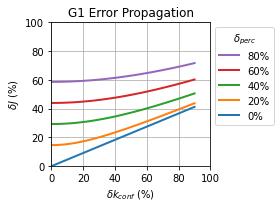

In [27]:
err_fig = plot_dJ_vs_d_k_conf(k_conf_perc_err, J_perc_err, rel_errors)

In [28]:
err_fig.savefig("dJ_vs_dk_conf.png", dpi=300)

## Operational Fluxes

Convert the net cycle flux functions for G1 and G2 into Python lambda functions.

In [29]:
G1_net_cycle_flux_func = expressions.construct_lambda_funcs(G1_sympy_func, rate_names1)
G2_net_cycle_flux_funcs = expressions.construct_lambda_funcs(G2_sympy_funcs, rate_names2)

Set parameters:

In [30]:
A_on = 1e10
A_off = 1e3
B_on = 1e9
B_off = 1e2
k_conf = 100
A_in = 10**(-6.5)
A_out = 10**(-7.5)
c_B = 10**(-7)

Create array of leakage values:

In [31]:
# set min/max order of magnitude
power_min = -3
power_max = 2
steps = 100
leak_arr = np.logspace(power_min, power_max, steps)

Create an array for the net cycle flux for G1, but the same length as the leakage array (for plotting).

In [32]:
G1_flux = G1_net_cycle_flux_func(A_on, A_off, B_on, B_off, k_conf, A_in, A_out, c_B)
G1_flux_arr = np.ones((steps,)) * G1_flux

Create the net cycle flux arrays for G2. Let's print the cycles that were used to construct the net cycle flux functions first.

In [33]:
print(G2_cycles_reordered)

[[0, 5, 4, 3], [0, 5, 4, 3, 2, 1], [0, 3, 2, 1]]


Let's now assign the indices for each cycle, for later use.

In [34]:
G2_cycle_A_idx = 2
G2_cycle_B_idx = 0
G2_cycle_prod_idx = 1

In [35]:
G2_flux = []
for k_leak in leak_arr:
    G2_fluxes = []
    for func in G2_net_cycle_flux_funcs:
        G2_fluxes.append(func(A_on, A_off, B_on, B_off, k_conf, k_leak, A_in, A_out, c_B))
    G2_flux.append(G2_fluxes)
G2_flux = np.array(G2_flux)

In [36]:
# assign arrays more useful variable names
G2_productive_cycle_flux_arr = G2_flux[:, G2_cycle_prod_idx]
G2_cycle_A_flux_arr = G2_flux[:, G2_cycle_A_idx]
G2_cycle_B_flux_arr = G2_flux[:, G2_cycle_B_idx]
# calculate the operational fluxes for cycles A and B for G2
A_flux_arr = G2_productive_cycle_flux_arr + G2_cycle_A_flux_arr
B_flux_arr = G2_productive_cycle_flux_arr + G2_cycle_B_flux_arr

In [37]:
def plot_stacked_flux_fig(leak_arr, G1_flux_arr, G2_productive_cycle_flux_arr, A_flux_arr, B_flux_arr):
    """
    Custom plotting function for plotting the net cycle flux,
    operational fluxes, and stoichiometry for both G1 and G2.
    """
    fig, axs = plt.subplots(3, figsize=(5, 5), sharex=True, tight_layout=True)

    axs[0].semilogx(leak_arr, G1_flux_arr, '--', lw=2, color="black", label="G1")
    axs[0].semilogx(leak_arr, G2_productive_cycle_flux_arr, '-', lw=2, color="orange", label="G2")
    axs[0].set_title("Net Cycle Flux: Productive Cycle")
    axs[0].set_ylabel(r"Flux ($s^{-1}$)")
    axs[0].set_ylim(0, 10)
    axs[0].legend(bbox_to_anchor=(1, 1))
    axs[0].grid(True)

    axs[1].semilogx(leak_arr, G1_flux_arr, '--', lw=2, color="black", label="G1")
    axs[1].semilogx(leak_arr, A_flux_arr, '-', color='red', lw=2, label=r"G2$_{A}$")
    axs[1].semilogx(leak_arr, B_flux_arr, '-', color='blue', lw=2, label=r"G2$_{B}$")
    axs[1].set_title("Operational Flux")
    axs[1].set_ylabel(r"Flux ($s^{-1}$)")
    axs[1].set_ylim(0, 20)
    axs[1].legend(bbox_to_anchor=(1, 1))
    axs[1].grid(True)

    axs[2].axhline(y=1, ls='--', color='black', label="G1")
    axs[2].semilogx(leak_arr, B_flux_arr/A_flux_arr, '-', lw=2, color="orange", label="G2")
    axs[2].set_title("Stoichiometry: Substrate/Driving Ion")
    axs[2].set_xlabel(r"$k_{leak}$ ($s^{-1}$)")
    axs[2].set_ylim(0, 1.1)
    axs[2].legend(bbox_to_anchor=(1, 1))
    axs[2].grid(True)

    axs[0].set_xlim(leak_arr[0], leak_arr[-1])
    return fig

In [38]:
def draw_cycles_custom(
    G,
    cycles,
    pos=None,
    panel_scale=2,
    rows=None,
    cols=None,
    font_size=12,
    cbt=False,
    curved_arrows=False):
    """
    Custom cycle plotting function based on the `kda.plotting.draw_cycles` function.
    """

    if curved_arrows:
        connection_style = "arc3, rad = 0.11"
    else:
        connection_style = "arc3"

    nrows, ncols, excess_plots = plotting._get_panel_dimensions(n_diagrams=len(cycles), rows=rows, cols=cols)

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, tight_layout=True)
    fig.set_figheight(nrows * panel_scale)
    fig.set_figwidth(1.2 * ncols * panel_scale)

    xlims, ylims = plotting._get_axis_limits(pos, scale_factor=1.4)

    for i, cycle in enumerate(cycles):
        node_labels = plotting._get_node_labels(node_list=cycle)
        node_colors = plotting._get_node_colors(cbt=cbt, obj=cycle)
        cycle_edges = plotting._construct_cycle_edges(cycle)
        edge_list = plotting._append_reverse_edges(cycle_edges)

        ix = np.unravel_index(i, ax.shape)
        plt.sca(ax[ix])
        ax[ix].set_xlim(xlims)
        ax[ix].set_ylim(ylims)

        plotting._plot_single_diagram(
            diagram=G,
            pos=pos,
            edge_list=edge_list,
            node_list=cycle,
            node_labels=node_labels,
            node_colors=node_colors,
            node_size=150 * panel_scale,
            font_size=font_size,
            arrow_width=1.5,
            cbt=False,
            connection_style=connection_style,
            ax=ax[ix],
        )

    for j in range(excess_plots):
        ax.flat[-j - 1].set_visible(False)
    return fig

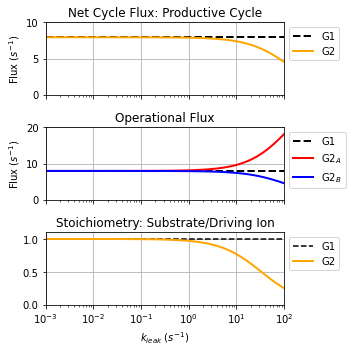

In [39]:
stacked_fig = plot_stacked_flux_fig(leak_arr, G1_flux_arr, G2_productive_cycle_flux_arr, A_flux_arr, B_flux_arr)

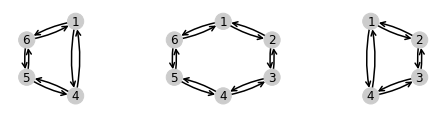

In [40]:
cycle_fig = draw_cycles_custom(G2, G2_cycles_reordered, pos=pos, panel_scale=1.75, font_size=12, curved_arrows=True)

In [41]:
stacked_fig.savefig(cwd+"/6wl_all_in_one_plot.png", dpi=300)

## Operational Fluxes from Net Transition Fluxes

We know the operational fluxes can be expressed in terms of net transition fluxes:

$\begin{flalign}
    J_{\text{H}^{+}}   &= J_{1,2} = J_{2,3} = J_{3,4}\\ 
    J_{\text{Na}^{+}}  &= J_{6,1} = J_{5,6} = J_{4,5}.
\end{flalign}$

We will just focus on a single net transition flux for each ligand. Expressed in terms of one-way transition fluxes:

$\begin{flalign}
    J_{\text{H}^{+}}   &= J_{2,3} = j_{2, 3} - j_{3, 2} = p_2 k_{2, 3} - p_3 k_{3, 2}\\ 
    J_{\text{Na}^{+}}  &= J_{5,6} = j_{5, 6} - j_{6, 5} = p_5 k_{5, 6} - p_6 k_{6, 5}.
\end{flalign}$

In [56]:
H_on, H_off, Na_on, Na_off, k_conf, k_leak,  H_in, H_out, c_Na = sympy.symbols(
    "H_on, H_off, Na_on, Na_off, k_conf, k_leak,  H_in, H_out, c_Na")
k12, k21, k23, k32, k34, k43, k45, k54, k56, k65, k61, k16, k14, k41 = sympy.symbols(
    "k12 k21 k23 k32 k34 k43 k45 k54 k56 k65 k61 k16 k14, k41")
sub_map = {
    k12 : H_on*H_out,
    k21 : H_off,
    k23 : k_conf,
    k32 : k_conf,
    k34 : H_off,
    k43 : H_on*H_in,
    k45 : Na_on*c_Na,
    k54 : Na_off,
    k56 : k_conf,
    k65 : k_conf,
    k61 : Na_off,
    k16 : Na_on*c_Na,
    k14 : k_leak, 
    k41 : k_leak,
}

In [74]:
G2_prob_strs = calculations.calc_state_probs(G2, key='name', output_strings=True)
p1, p2, p3, p4, p5, p6 = G2_prob_strs
J_H_trans = (p1.subs(sub_map) * sub_map[k12] - p2.subs(sub_map) * sub_map[k21]).simplify()
J_Na_trans = (p6.subs(sub_map) * sub_map[k61] - p1.subs(sub_map) * sub_map[k16]).simplify()

With the operational flux expressions defined in terms of net transition fluxes, lets create the operational fluxes using the cycles method.

In [75]:
cycle_labels = ["c", "b", "a"]
cycle_orders = [[0, 1], [5, 0], [0, 1]]

G2_cycles_dict = {}
for label, _cycle, _order in zip(cycle_labels, G2_cycles, cycle_orders):
    func = calculations.calc_net_cycle_flux(G2, cycle=_cycle, order=_order, key='name', output_strings=True)
    func = func.subs(sub_map).simplify()
    G2_cycles_dict[label] = {"cycle": cycle, "order": order, "func": func}

Cycle [0, 5, 4, 3, 2, 1] contains all nodes in G. No flux diagrams generated.
No flux diagrams detected for cycle [0, 5, 4, 3, 2, 1]. Sigma K value is 1.


In [76]:
J_a = G2_cycles_dict["a"]["func"]
J_b = G2_cycles_dict["b"]["func"]
J_c = G2_cycles_dict["c"]["func"]

J_H_cycle = (J_a + J_c).simplify()
J_Na_cycle = (J_b + J_c).simplify()

We can check if the expressions are identical by taking their difference and simplifying. 

In [77]:
(J_H_trans - J_H_cycle).simplify() == 0

True

In [78]:
(J_Na_trans - J_Na_cycle).simplify() == 0

True

In [79]:
rate_names = ["H_on, H_off, Na_on, Na_off, k_conf, k_leak, H_in, H_out, c_Na"]
J_H_t_lambda, J_Na_t_lambda = expressions.construct_lambda_funcs([J_H_trans, J_Na_trans], rate_names)

In [80]:
J_H_t_lambda

<function _lambdifygenerated(H_on, H_off, Na_on, Na_off, k_conf, k_leak, H_in, H_out, c_Na)>

In [81]:
H_on = 1.12e10
H_off = 1.775e3
Na_on = 3.011e9
Na_off = 9.0e3e7
k_conf = 69
H_in = 10**(-6.5)
H_out = 10**(-7.5)
c_Na = 10**(-7)
# set min/max order of magnitude
leak_arr = [0.01, 1, 100]

In [82]:
for kleak in leak_arr:
    JH = J_H_t_lambda(A_on, A_off, B_on, B_off, k_conf, kleak, A_in, A_out, c_B)
    JNa = J_Na_t_lambda(A_on, A_off, B_on, B_off, k_conf, kleak, A_in, A_out, c_B)
    print(kleak, JH, JNa)

0.01 -7.94161225894401 -7.939230489797074
1 -8.117056059274603 -7.8806369507520415
100 -18.13698894627937 -4.5342472365698425
